# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_function(data, correct_answers, f):
    for i in range(len(data)):
        answer = f(data[i])
        if answer != correct_answers[i]:
            print('WRONG ANSWER')
            print('Argument:', data[i])
            print('Correct answer:', correct_answers[i])
            print('Your answer:', answer)
            return
    print('SUCCESS')

## Problem 1: Longest run

Let `A` be a numpy 1D array of integers. We say that positions $i,i+1,\ldots,i+k-1$ form a **run** of length $k$ if
$A[i]=A[i+1]=\ldots=A[i+k-1]$. Write a function that returns the length of a longest run in `A`:

In [3]:
def longest_run(A):
    if len(A) == 0:
        return 0
    max_run = 1
    current_run = 1
    for i in range(1, len(A)):
        if A[i] == A[i - 1]:
            current_run += 1
            if current_run > max_run:
                max_run = current_run
        else:
            current_run = 1
    return max_run


In [4]:
longest_run([1,2,3,43,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,78,7,7,7,6,7,6,6,6,5,56,6,5,5,5,5,5])

16

Use the code below to test your function:

In [5]:
def generate_pseudorandom_array(n, k):
    m = 999331
    a = 8121
    b = 28411
    current = 91
    
    L = []
    for i in range(n):
        L.append(current % k)
        current = (a*current+b)%m
    return np.array(L)
data = [
    np.array([]),
    np.array([1]),
    np.array([1,2,1]),
    np.array([-1,-2,-2]),
    generate_pseudorandom_array(1000, 3),
    generate_pseudorandom_array(10000, 2),
    generate_pseudorandom_array(1000000, 2)
]
correct_answers = [0, 1, 1, 2, 7, 16, 16]
test_function(data, correct_answers, longest_run)

SUCCESS


## Problem 2: Lower upper

Write a function that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

Hint/reminder: To check if one character ``c`` is lowercase you use ``c.islower()``. To check uppercase you use ``c.isupper()``.

In [6]:
def count_letters(s):
    small_count, big_count = 0,0
    for i in s:
        if i.islower():
            small_count+=1
            
        elif i.isupper():
            big_count +=1
            
    return [small_count, big_count]
        

In [7]:
count_letters('AbCdEfG')

[3, 4]

Test your function using the code below:

In [8]:
data = [
    '',
    'abc',
    'ABC',
    'aBcDeFg',
    'AbCdEfG',
    'abc123ABC',
    '!2a!!!?'
]
correct_answers = [[0, 0], [3, 0], [0, 3], [4, 3], [3, 4], [3, 3], [1, 0]]
test_function(data, correct_answers, count_letters)

SUCCESS


## Problem 3: Sum of maximums

Write a function that takes one argument: A 2-dimensional **numpy array** of floats ``M`` and:
* For each column computes the maximum negative element.
* Returns the sum of those elements.

In [9]:
test = np.random.randint(10, size=(2,3))
test

array([[3, 9, 3],
       [7, 6, 1]])

In [10]:
test.shape[1]

3

In [11]:
for col in test.T:
    print(col)

[3 7]
[9 6]
[3 1]


In [12]:


for col in test.T:
    print(col)

[3 7]
[9 6]
[3 1]


In [13]:
import numpy as np

def sum_max_negative_columns(M):
    max_negatives = []
    
    for col in range(M.shape[1]):
        column = M[:, col]
        negative_elements = column[column < 0]
#         print(column, negative)
        if len(negative_elements) > 0:
            max_negatives.append(np.max(negative_elements))
        else:
            max_negatives.append(0)
    
    return sum(max_negatives)


In [14]:
data = [
    np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]]),
    np.array([[-1., 4., 1., -2., -3., -5.],
             [1., 4., 1., -2., -3., -5.],
             [1., -4., 1., 2., 3., -5.]]),
    np.array([[-1000.], [-50.], [10.]]),
    np.array([[-1000., -50., 10.]])
]
correct_answers = [0, -15, -50, -1050]
test_function(data, correct_answers, sum_max_negative_columns)

SUCCESS


## Problem 4: Points on a circle

Write a function that takes a positive integer `n` and returns a pair of arrays `X, Y` such `(X[i],Y[i])` are `n` evenly spaced points on the unit circle $\{(x,y):x^2+y^2=1\}$. For example, for `n=4` your function can return `X=[1,0,-1,0]` and `Y=[0,1,0,-1]` (other correct answers are possible). Test your function on a few examples for different values of `n` and visualise the results.

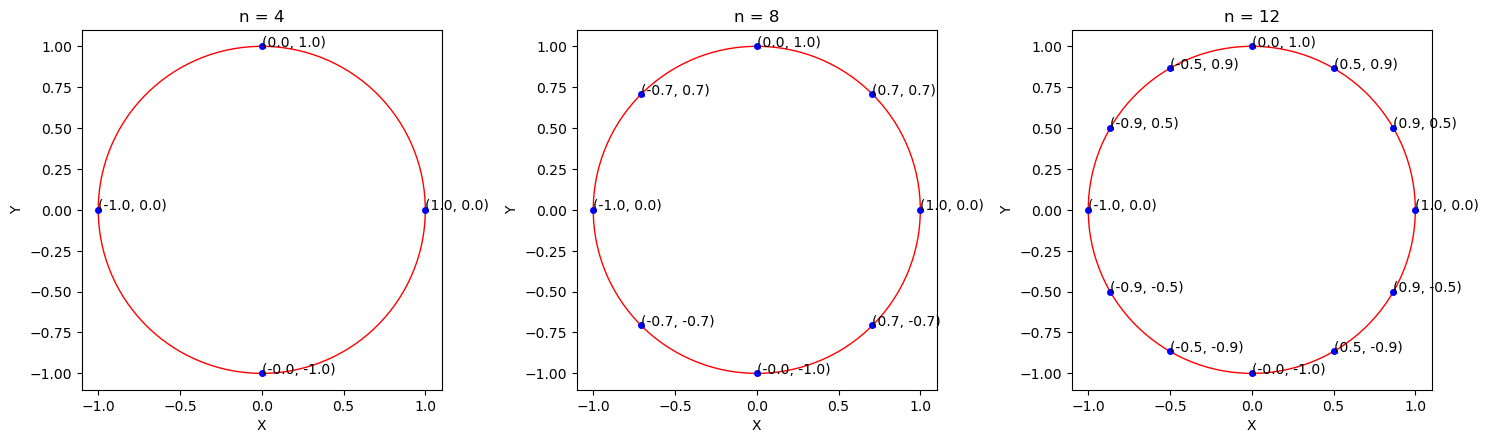

In [15]:


def unit_circle_points(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    X = np.cos(angles)
    Y = np.sin(angles)
    return X, Y


# Test the function and visualize the results
n_values = [4, 8, 12]
fig, axes = plt.subplots(1, len(n_values), figsize=(15, 5))

for i, n in enumerate(n_values):
    X, Y = unit_circle_points(n)
    axes[i].plot(X, Y, 'o', markersize=4, color='blue')
    axes[i].set_title(f'n = {n}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')

  # Add the unit circle outline
    circle = plt.Circle((0, 0), 1, color='red', fill=False)
    axes[i].add_artist(circle)
    axes[i].set_aspect('equal')
    for j in range(n):
        axes[i].text(X[j], Y[j], f"({round(X[j], 1)}, {round(Y[j], 1)})")

plt.tight_layout()
plt.show()

## Problem 5: Newton method for computing square roots

In [16]:
import numpy as np

Write a function that takes two arguments: floating-point positive numb a function that takes two arguments: floating-point positive numbers ``x`` and ``error_bound`` and returns the floating-point approximation of the square root of ``x``. The function should use Newton'sers ``x`` and ``error_bound`` and returns the floating-point approximation of the square root of ``x``. The function should use Newton's method given by the formula:

$y_0 = x/2$

$y_{i+1} = \left(y_i + \frac{x}{y_i}\right) / 2$

You will need to decide when to stop the iteration. Use a ``while`` loop to stop when 

$|y_i - y_{i+1}| < \textrm{error\_bound}$

If you need to understand the method better, you can look it up on Wikipedia:
https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method

In [17]:
def newton_square_root(x, error_bound=1e-9):
    ycurrent= x/2
    yprevious = 0.00
    
    while np.abs(ycurrent-yprevious)> error_bound:
        yprevious = ycurrent
        print(yprevious)
        ycurrent = (yprevious + x/yprevious)/2
#         return 
        
    return ycurrent
        

In [18]:
newton_square_root(.02)

0.01
1.005
0.5124502487562188
0.2757392138419574
0.17413575804495918
0.1444943381958916
0.1414540330128693
0.14142136001158034
0.14142135623730956


0.1414213562373095

In [19]:

# import pandas as pd


# testdata = np.linspace(0.01,.999, 5)
# for i in testdata:
# #     solutions = pd.DataFrame(newton_square_root(i))
#     print(newton_square_root(i), end = "\t")

Test your method on some examples

**Bonus** Read on measuring execution time in Python (for example the ``timeit`` package). Compare the speed of your function (you should make many calls, for example 100000) for different error bounds. Also compare with Python functions ``math.sqrt`` and `np.sqrt`.

## Problem 6: Special triples

* Write a function that takes two inputs: positive integers `x` and `y`. The function outputs `True` if the digits of `y` are a permutation of digits of `x`. Please consult the testing code to make sure you understand the problem statement.

In [20]:
def is_permutation(x, y):
    # Convert both integers to their string representations
    str_x = str(x)
    str_y = str(y)
    
    # If the lengths of the strings are different, they cannot be permutations
    if len(str_x) != len(str_y):
        return False
    
    if str_x == str_y:
        return True
    
    sorted_x = sorted(str_x)
    sorted_y = sorted(str_y)
    

    return sorted_x == sorted_y

In [21]:
data = [
    (123, 124),
    (11, 111),
    (178, 871),
    (1151, 5111),
    (2123, 1223),
    (1266, 2116)
]
correct_answers = [False, False, True, True, True, False]
def test_permutation(data, correct_answers, f):
    for i in range(len(data)):
        answer = f(*data[i])
        if answer != correct_answers[i]:
            print('WRONG ANSWER')
            print('Argument:', data[i])
            print('Correct answer:', correct_answers[i])
            print('Your answer:', answer)
            return
    print('SUCCESS')

In [22]:
test_permutation(data, correct_answers, is_permutation)

SUCCESS


* Use the function `is_permutation` and other Python code to find all triples of integers $0<a<b<c<10^4$ such that:
    1) $a,b,c$ are an arithmetic progression, that is $b-a=c-b$.
    2) All of $a,b,c$ are prime numbers.
    3) Digits of $a,b,c$ are permutations of each other.

In [23]:
highest = 10_000

def is_prime(n):
    
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return 0
    return 1

primes = [n for n in range(2, highest) if is_prime(n)]

triples = []

for i in range(len(primes)):
    for j in range(i + 1, len(primes)):
        a = primes[i]
        b = primes[j]
        c = 2 * b - a
        if c < highest and c in primes and is_permutation(a, c) and is_permutation(b, c):
            triples.append((a, b, c))


for triple in triples:
    print(triple)

(1487, 4817, 8147)
(2969, 6299, 9629)


## Problem 7: Snake list

Write a function that takes as input a square matrix (list of lists) and returns a list which contains all elements from the matrix in a "snake" (spiral) fashion.

In [24]:
import pandas as pd

def snake_list(matrix):
    df = pd.DataFrame(matrix)
    res = []

    while not df.empty:
        res.extend(df.iloc[0])
        df = df.drop(df.index[0])
        if not df.empty:
            df = df.T[::-1].reset_index(drop=True)

    return res


In [25]:
M = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

In [26]:
snake_list(M)

[1, 2, 3, 6, 9, 8, 7, 4, 5]

For the matrix above ``snake_list`` should return the list ``[1, 2, 3, 6, 9, 8, 7, 4, 5]``.

In [27]:
M2 = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

In [28]:
snake_list(M2)

[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]

In [29]:
matrix = [
    [1, 2, 3,4,5,6],
    [7,8,9,10,11,12],
    [33,34,35,36,37,38],
    [15,16,17,18,19,20],
    [21,22,23,24,25,26],
    [27,28,29,30,31,32]
]

And for this one it should return ``[1, 2, 3, 4, 8, 12, 16, 15, 14, 13, 9, 5, 6, 7, 11, 10]``.

## Problem 8: Neural networks

A **fully-connected ReLU neural network with one hidden layer** with $d$ **inputs**, $n$ **hidden neurons** and $o$ **outputs** is defined by four arrays of real parameters (**weights**):

$$W\in\mathbb{R}^{d\times n},b\in\mathbb{R}^n,V\in\mathbb{R}^{n\times o},b'\in\mathbb{R}^{o}$$

Given the parameters $\theta=(W,b,V,b')$, the neural network computes a function $f_\theta:\mathbb{R}^d\to\mathbb{R}^o$ using the formula:

$$f_\theta(x)_k = b'_k+\sum_{j=1}^n V_{jk}\mathrm{ReLU}\left(b_j+\sum_{i=1}^d W_{ij}x_i\right)\text{ for }k=1,\ldots,o\;.$$

Using matrix notation (and applying ReLU componentwise), we can write this as

$$ \text{Eq. (1):}\qquad\qquad f_\theta(x) = b'+ V^T \mathrm{ReLU}( b+ W^T x) $$

In this problem, we consider a neural network solution for the problem of **handwritten digit classification**. This is a well-known problem for which we will use a public dataset called MNIST. Our input will be grayscale (black-white) pictures with $28\times 28=784$ pixels. Therefore, we will take
$d=784$. The problem we are solving is classifying the digits into one of the values $0,1,\ldots,9$. Accordingly, we will take the number of outputs $o=10$. The network's output (which is a vector with 10 coordinates) is given by Eq. (1). Then, the network's **prediction** will be the index of the output coordinate (neuron) which gave the largest value. Mathematically,

$$ \text{Eq. (2):}\qquad\qquad\mathrm{pred}_{\theta}(x)=\mathrm{argmax}_{k=0,1,\ldots,9}\; f_\theta(x)_k\;.$$

a) Download `mnist_input.npz` and `mnist_weights.npz` files. Several numpy arrays are stored inside those files. Use numpy `np.load` function to load those arrays into memory

In [30]:
import numpy as np
import matplotlib.pyplot as plt 

mnist_input_data = np.load('mnist_inputs.npz')
mnist_weights_data = np.load('mnist_weights.npz')



In [31]:
# To access the arrays stored in the .npz files, you can use the files' keys
print("Keys in mnist_input.npz:", mnist_input_data.files)
print("Keys in mnist_weights.npz:", mnist_weights_data.files)


Keys in mnist_input.npz: ['images', 'labels']
Keys in mnist_weights.npz: ['W', 'b', 'V', 'bprime']


## The Input Layer data/ input

In [32]:
images = mnist_input_data['images']
labels = mnist_input_data['labels']



## Weights of our Hidden Layers 
ie The lecturer gave us the pretrained weights to the model rather than starting with random weights 

In [33]:
W = mnist_weights_data['W']
b = mnist_weights_data['b']
V = mnist_weights_data['V']
b_prime = mnist_weights_data['bprime']

## The arrays for the imputs for each of the columns

In [34]:

print("Images Shape")
print(images.shape)
print("Images Labels Shape ")
print(labels.shape)



Images Shape
(10000, 784)
Images Labels Shape 
(10000,)


## The arrays for weights for each of the columns 

In [35]:
print("Weights Shape")
print(W.shape)

print("vector b Shape")
print(b.shape)

print("V Shape")
print(V.shape)

print("bprime Shape")
print(b_prime.shape)

Weights Shape
(784, 12)
vector b Shape
(12,)
V Shape
(12, 10)
bprime Shape
(10,)


b) First, consider `images` and `labels` arrays loaded from `mnist_inputs.npz`. Given index `i`, the element `images[i]` represents a $28\times 28$ black-white picture with a handwritten digit. Then, the element `labels[i]` is an integer specifying which digit is in the picture.

Use `matplotlib` to visualise some example images and check their labels. Hint: look up `np.reshape` and `plt.imshow` functions.

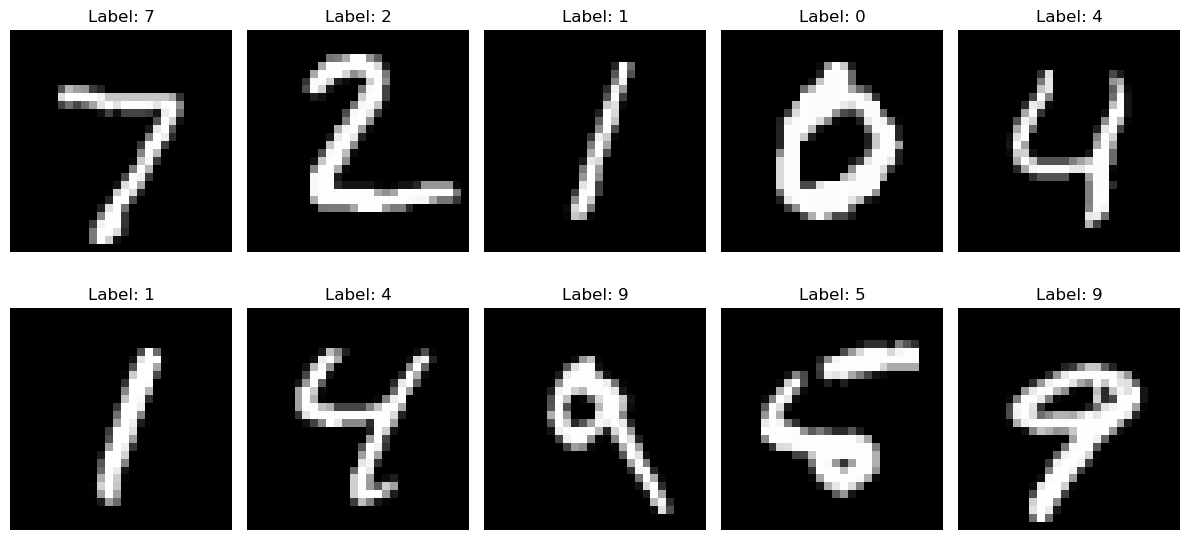

In [36]:
def visualize_images(indices):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    
    for idx, ax in zip(indices, axes.flatten()):
        input_array_1 = images[idx]
        input_array_2 = labels[idx]
        
        image_reshaped = np.reshape(input_array_1, (28, 28))
        
        ax.imshow(image_reshaped, cmap='gray')
        ax.set_title(f'Label: {input_array_2}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_images(range(10))


In [37]:
import numpy as np

class NeuralNetwork:
    def __init__(self, W, b, V, b_prime):

        self.W = W
        self.b = b
        self.V = V
        self.b_prime = b_prime
    # Return the output according to Eq. (1).
    # Try writing the function so that x can be either:
    #     1) A vector encoding one image. In that case the output should be a vector.
    #     2) A matrix with many rows, one row per image. In that case the output should be a matrix.
    
    
    
    
    
    def relu(self, x):

        return np.maximum(0, x)

    def evaluate(self, x):
        if x.ndim == 1:
            # If x is a vector
#             z = np.dot(self.W.T, x) + self.b
            z = self.W.T@ x + self.b
            h = self.relu(z)
            output = self.V.T@ h + self.b_prime
        else:
            # If x is a matrix
            z = x@ self.W + self.b
            h = self.relu(z)
            output = h@ self.V + self.b_prime

        return output
    
        # Return the prediction according to Eq. (2).
    # As with evaluate, try to create a function that works for x 
    # which can be either a vector or a matrix.
    
    

    def predict(self, x):
        output = self.evaluate(x)
        if x.ndim == 1:
            # If x is a vector, return a single prediction
            return np.argmax(output)
        else:
            # If x is a matrix, return predictions for each row
            return np.argmax(output, axis=1)

    def get_accuracy(self, x, labels):

        predictions = self.predict(x)
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        
        return accuracy





c) Create a `NeuralNetwork` class with methods `__init__`, `evaluate` and `predict`. Look in the comments for further instructions:

##  Create a NeuralNetwork instance

In [38]:
Fitted_model = NeuralNetwork(W, b, V, b_prime)

# Test on a single image

In [39]:
# Test on a single image
single_image = images[0]
print("Output for a single image:")
print(Fitted_model.evaluate(single_image))

Output for a single image:
[ -0.45998187 -11.95910649   1.75289867   4.18892743  -3.42243753
   0.30823608  -7.76776153   9.92415517  -0.93978193   3.22780885]


# Test on multiple images

* Given the output of an array with 11 outputs 
* The goal is to look for the one with the highest weight for instance:
* The prediction for the 1st picture is indexed at 7 first row 
* The imdex with the highest weight is the one the model is predicting as the number from a given input into 
* Fitted Model and the number for the first input is 7

In [40]:
# Test on multiple images
print("Output for multiple images:")
print(Fitted_model.evaluate(images[:10]))

Output for multiple images:
[[ -0.45998187 -11.95910649   1.75289867   4.18892743  -3.42243753
    0.30823608  -7.76776153   9.92415517  -0.93978193   3.22780885]
 [ -0.0849092    1.11349293   8.56781225   4.80071688 -16.12149105
    5.58460642   4.281063   -12.20881373   2.05820625 -15.26011916]
 [ -5.30826643   4.67848808   0.47731565  -0.92015269  -4.28192505
   -1.07730043  -3.18104692  -0.81236035  -0.38178569  -3.00149905]
 [ 11.0084924  -12.79912769   1.32953534  -0.46946401  -5.33783679
   -0.20394259   1.50454215   1.423125     0.52173215  -0.97242643]
 [ -0.35052832  -5.77851076   1.98249724  -1.48359007   7.65844534
   -0.24752229   1.62821678   2.3495278    1.55895814   4.09297057]
 [ -7.5858401    5.9537375   -0.62802047  -1.24638918  -5.80291452
   -1.62878513  -5.80334879  -0.45582201  -0.82049669  -2.24220237]
 [ -4.31326791  -1.07546101  -5.02993376  -0.24783829   8.74950785
    2.76702013  -3.29669685   2.61207868   3.6101984    3.84824202]
 [ -7.70740509   0.66758421

# Test predictions

* Now we want to retrive the index positions for each of the highest weights in the predictions 

In [41]:

print("Predictions for multiple images:")
print(Fitted_model.predict(images[:10]))


Predictions for multiple images:
[7 2 1 0 4 1 4 9 6 9]


# Test accuracy

In [42]:
print("Accuracy on the first 500 images:")
print(Fitted_model.get_accuracy(images[:500], labels[:500]))

Accuracy on the first 500 images:
0.938


d) Test your function on:
* Random weight matrices initialized according to the standard Gaussian distribution. Try a few different values of $n$. Can you interpret the results?
* The weight matrices loaded from the `mnist_weights.npz` file. What is the $n$ of those weights? What is the accuracy? 

In [43]:
W_loaded = mnist_weights_data['W']
b_loaded = mnist_weights_data['b']
V_loaded = mnist_weights_data['V']
b_prime_loaded = mnist_weights_data['bprime']

# Test with random weights initialized from a Gaussian distribution
def test_random_weights(hidden_neurons_list):
    accuracies = []
    for n in hidden_neurons_list:
        d = 784  # Input dimension
        o = 10   # Output dimension
        W_random = np.random.randn(d, n)
        b_random = np.random.randn(n)
        V_random = np.random.randn(n, o)
        b_prime_random = np.random.randn(o)
        nn = NeuralNetwork(W_random, b_random, V_random, b_prime_random)
        accuracy = nn.get_accuracy(images[:1000], labels[:1000])  # Use a subset for testing
        accuracies.append((n, accuracy))
        print(f"Hidden neurons: {n}, Accuracy with random weights: {accuracy:.4f}")
    return accuracies

# Test with loaded weights
def test_loaded_weights():
    nn = NeuralNetwork(W_loaded, b_loaded, V_loaded, b_prime_loaded)
    accuracy = nn.get_accuracy(images[:1000], labels[:1000])  # Use a subset for testing
    print(f"Accuracy with loaded weights: {accuracy:.4f}")
    return accuracy

# Test with different values of hidden neurons
hidden_neurons_list = [100, 500, 1000, 2000]
random_weight_accuracies = test_random_weights(hidden_neurons_list)
loaded_weight_accuracy = test_loaded_weights()


Hidden neurons: 100, Accuracy with random weights: 0.0900
Hidden neurons: 500, Accuracy with random weights: 0.0850
Hidden neurons: 1000, Accuracy with random weights: 0.1390
Hidden neurons: 2000, Accuracy with random weights: 0.0910
Accuracy with loaded weights: 0.9280


* For the random weights the Accuracies are really bad as there is a need for implementation of Backpropagation such that the model updates its weights at each epoch/ training iteration 
* The model with the pretrained/ pre-optimized weights is perfoming pretty well with an accuracy of 93% 

## Problem 9: Working with files

This exercise is to practice working with files. 

There is a file ``sorted_small.txt`` included with this assignment. Solve the problem described below reading your inputs from the file.

**Please read the following instructions carefully.** The file contains a number of inputs. **Each input consists of three lines**:
* The first line contains two integers $1 \le a \le b$.
* The second line contains one integer $1 \le n$.
* The third line contains $n$ sorted integers $$1 \le s_1 \le s_2 \le \ldots \le s_n.$$

All integers on a line are separated by spaces. **You can open the file and see for yourself to understand the input**.

For each input, you should output ``True`` or ``False``. You should output ``True`` if there exists $1\le i \le n$ such that
$$a \le s_i \le b.$$

**Make a list of all your outputs and compare it with the list of correct answers below**.

In [44]:
def check_condition(filename):
    results = []
    with open(filename, 'r') as file:
        while True:
            # Read the first line containing l and u
            line = file.readline()
            if not line:
                break
            l, u = map(int, line.strip().split())
            
            # Read the second line containing m
            m = int(file.readline().strip())
            
            # Read the third line containing sorted integers
            sorted_integers = list(map(int, file.readline().strip().split()))
            
            # Check if there exists s such that l <= s <= u
            result = any(l <= s <= u for s in sorted_integers)
            results.append(result)
    
    return results

# Read the results from the file
filename = 'sorted_small.txt'
results = check_condition(filename)

# Print results
print(results)


[False, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False]


In [45]:
correct_answers = [False, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False]

# Lets check if the results are equal


In [46]:
def test(results, correct_answers):
    if len(results) != len(correct_answers):
        return "Failed"

    for i in range(len(results)):
        if results[i] != correct_answers[i]:
            return "Failed"
            
    return 'Success'

In [47]:
print(test(results, correct_answers))

Success


BONUS: You can try writing "binary search" instead of going through the list left-to-right.

## Problem 10: Sorting lectures 

Create a class `Lecture` such that each object contains three attributes (variables) `starting_time`, `finish_time` and `id_number`. Write the `__init__`, `__str__` and `__lt__` methods so that you can sort the a list of lectures according to the starting time. Create a list of lectures to test your class.

In [48]:
class Lecture:
    def __init__(self, starting_time, finish_time, id_number):
        self.starting_time = starting_time
        self.finish_time = finish_time
        self.id_number = id_number

    def __str__(self):
        return f"Lecture {self.id_number}: {self.starting_time} - {self.finish_time}"

    def __lt__(self, other):
        return self.starting_time < other.starting_time



  # Create a list of lectures to test the class

In [49]:

lectures = [
    Lecture(9, 10, 'MPS'),
    Lecture(11, 12, 'PPS'),
    Lecture(10, 11, 'PYTHON'),
    Lecture(8, 9, 'BAYES'),
]

# Sort the lectures by starting time
sorted_lectures = sorted(lectures)

# Print the sorted lectures
for lecture in sorted_lectures:
    print(lecture)


Lecture BAYES: 8 - 9
Lecture MPS: 9 - 10
Lecture PYTHON: 10 - 11
Lecture PPS: 11 - 12


## Problem 11: Scheduling classrooms

You are the head tutor in charge of AIMS schedule. The building has $k$ classrooms numbered from 1 to $k$ and you are given a list of $n$ lectures. Each lecture is a pair of integers $(s_i, f_i)$ where $s_i$ is the starting time and $f_i$ the finishing time of the lecture, $0\le s_i\le f_i\le 10^6$. Your task is to assign classrooms to lectures, so that no two lectures that overlap in time are assigned to the same room. If one lecture finishes at exactly the same time as another lecture starts, you are allowed to place them in the same room.

Return a list of $n$ integers, where for every lecture you specify the room. If it is not possible to schedule all lectures, return the integer $-1$.

In [50]:
class LectureScheduler:
    def __init__(self, num_rooms, lectures):
        self.num_rooms = num_rooms
        self.lectures = lectures
        self.schedule = [-1] * len(lectures)  
        self.rooms = []  

    def assign_rooms(self):
        
        if not self.lectures:
            return self.schedule

        
        self.lectures.sort(key=lambda x: x[0])
        
        for i in range(len(self.lectures)):
            assigned = False
            
            for room_id in range(len(self.rooms)):
                
                if self.rooms[room_id][-1][1] <= self.lectures[i][0]:
                    self.rooms[room_id].append(self.lectures[i])
                    self.schedule[i] = room_id + 1
                    assigned = True
                    break

            if not assigned:
                if len(self.rooms) < self.num_rooms:
                    self.rooms.append([self.lectures[i]])
                    self.schedule[i] = len(self.rooms)
                else:
                    return -1
        
        return self.schedule


**Examples** On input `k=1` and `L=[(3, 5), (1, 3)]`, the output should be
`[1, 1]`, as you have to put all lectures in the only classroom available. It is fine that the first lecture starts at the same time as the second lecture ends.

For input `k=1` and `L=[(3, 6), (1, 4)]`, the output is `-1`, as from time 3 to 4 there are two lectures at the same time.

For `k=2` and `L=[(3, 6), (1, 4)]`, the output can be `[1, 2]`. However, it is not the only correct output.

For `k=2` and `L=[(4, 7), (9, 12), (5, 8), (2, 5), (1, 3)]`, a correct output is `[1, 1, 2, 2, 1]`. Again, the correct output is not unique.

In [51]:
scheduler = LectureScheduler(1, [(3, 5), (1, 3)])
print(scheduler.assign_rooms())  
scheduler = LectureScheduler(1, [(3, 6), (1, 4)])
print(scheduler.assign_rooms())  
scheduler = LectureScheduler(2, [(3, 6), (1, 4)])
print(scheduler.assign_rooms()) 
scheduler = LectureScheduler(2, [(4, 7), (9, 12), (5, 8), (2, 5), (1, 3)])
print(scheduler.assign_rooms())

[1, 1]
-1
[1, 2]
[1, 2, 1, 2, 1]
